In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import load_model # type: ignore
from tensorflow.keras.applications import MobileNetV3Small

# input_shape = (64, 64, 3)

# base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=input_shape)
# base_model.trainable = False

# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(1, activation='sigmoid')
# ])

model = load_model('/Users/jorgecamero/Downloads/modelo_BN.keras')

dataset_dir = "/Users/jorgecamero/MoireDataset/BN_aug"

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="int",
    class_names=["Reales_aug", "Ataque_aug"],
    batch_size=1,
    image_size=(64, 64),
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True
).map(preprocess)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="int",
    class_names=["Reales_aug", "Ataque_aug"],
    batch_size=1,
    image_size=(64, 64),
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True
).map(preprocess)

# Configuración de AdamW con la tasa de aprendizaje especificada
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, epochs=15, validation_data=val_data)

Found 905 files belonging to 2 classes.
Using 724 files for training.
Found 905 files belonging to 2 classes.
Using 181 files for validation.
Epoch 1/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7205 - loss: 2.0585 - val_accuracy: 0.7624 - val_loss: 1.7625
Epoch 2/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8299 - loss: 1.2535 - val_accuracy: 0.7680 - val_loss: 1.5929
Epoch 3/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8410 - loss: 1.0639 - val_accuracy: 0.7569 - val_loss: 1.4736
Epoch 4/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8590 - loss: 0.9281 - val_accuracy: 0.7459 - val_loss: 1.3968
Epoch 5/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8664 - loss: 0.8314 - val_accuracy: 0.7459 - val_loss: 1.3129
Epoch 6/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8745 - loss: 0.7444 - val_accuracy: 0.7293 - val_loss: 1.2365
Epoch 7/15
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8801 - los

In [26]:
model.save("/Users/jorgecamero/Downloads/modelo_BN.keras")

In [31]:
from keras.models import load_model # type: ignore

model = load_model("/Users/jorgecamero/Downloads/modelo_BN.keras")

I0000 00:00:1730389232.833805 2392063 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730389232.912329 2397099 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


0.0030084907
Color


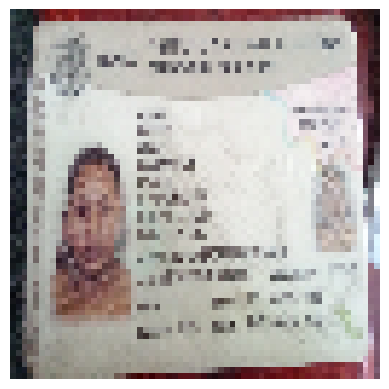

In [3]:
from utils import load_img
from tensorflow.keras.preprocessing import image as img_keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import os
import io

path = '/Users/jorgecamero/MoireDataset/BN_aug'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

# path = '/Users/jorgecamero/Downloads/fwinesfalsas'
# imgs = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith('.jfif')]

# with open(imgs[3], 'rb') as file:
#     image = Image.open(file)
#     image = image.convert("RGB")

# buffer = io.BytesIO()
# image.save(buffer, format='JPEG')

# buffer.seek(0)
# image_jpg = Image.open(buffer)

# random_img = np.array(image_jpg)

random_img = '/Users/jorgecamero/MoireDataset/BN/Reales/bi1722285173.4460056-2_front_large.jpg'

img = load_img(random_img, height=64, width=64)
img = img_keras.img_to_array(img) / 255
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, verbose=False)[0][0]
print(prediction)
prediction_label = "Color" if prediction < 0.5 else "BN"

print(prediction_label)
plt.imshow(load_img(random_img, width=64, height=64))
plt.axis('off')
plt.show()


In [33]:
import os
import shutil
from tqdm import tqdm
from keras.models import load_model # type: ignore
from tensorflow.keras.preprocessing import image
from IPython.display import clear_output
import matplotlib.pyplot as plt

#model = load_model('checkpoint/modelo_BN.keras')
path = 'detectados'

img_list = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
pause_time = 0.5

cnt = 0
output_path = "detectados.csv"
output_dir = "detectados"
os.makedirs(output_dir, exist_ok=True)

with open(output_path, "w") as f:
    f.write("path,score\n")
    progress_bar = tqdm(img_list, desc="Procesando imágenes")
    
    for img_path in progress_bar:
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img) / 255
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img, verbose=False)[0][0]
        prediction_bin = 0 if prediction < 0.8 else 1

        if prediction_bin:
            cnt += 1
            #shutil.copyfile(img_path, os.path.join(output_dir, os.path.basename(img_path)))
            #f.write(f"\"{img_path}\",{1 - prediction}\n")  # Agrega el path y el score al archivo
            #f.flush()  # Fuerza el guardado inmediato de la línea

        progress_bar.set_postfix({'Imágenes detectadas': cnt})
        # filename = os.path.basename(img_path)
        # plt.imshow(load_img(img_path))
        # plt.title(filename)
        # plt.axis('off')
        # print(prediction)
        # plt.draw()
        # plt.pause(pause_time)
        # clear_output(wait=True)

Procesando imágenes: 100%|██████████| 83/83 [00:06<00:00, 13.73it/s, Imágenes detectadas=83]


In [ ]:
from PIL import Image
import os

# Ruta de la carpeta de origen y la de destino
input_folder = '/Users/jorgecamero/MoireDataset/BN_aug/Reales'
output_folder = '/Users/jorgecamero/MoireDataset/BN_aug/Ataque'

# Crear la carpeta de destino si no existe
os.makedirs(output_folder, exist_ok=True)

# Iterar sobre cada imagen en la carpeta
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        
        # Abrir la imagen
        img = Image.open(img_path)
        
        # Convertir a blanco y negro (grayscale)
        img_bw = img.convert("L")
        
        # Convertir la imagen en escala de grises a RGB
        img_bw_rgb = img_bw.convert("RGB")
        
        # Guardar la imagen en la carpeta de destino
        img_bw_rgb.save(os.path.join(output_folder, filename))

print("Conversión completada.")